# Explore here

In [6]:
import pandas as pd

# Load the dataset from the given URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
sales_data = pd.read_csv(url)


In [15]:
# Convert 'date' column to datetime and set it as index
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data.set_index('date', inplace=True)

# Construct the time series
ts_total = sales_data['sales']


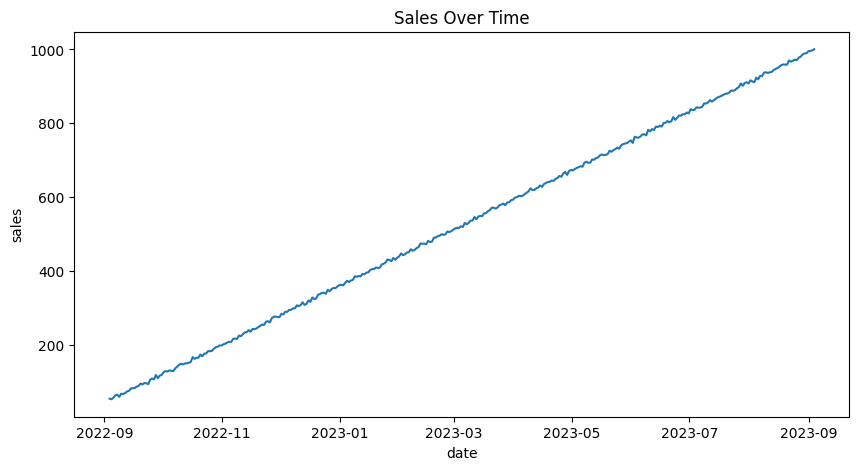

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sales time series
plt.figure(figsize=(10, 5))
sns.lineplot(data=ts_total)
plt.title('Sales Over Time')
plt.show()


In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Split data into training and testing sets
train_data = ts_total[:-12]  # Use all but the last 12 months for training
test_data = ts_total[-12:]   # Use the last 12 months for testing

# Fit the ARIMA model with chosen p, d, q parameters
model = ARIMA(train_data, order=(2, 1, 2))  # Example parameters
arima_model = model.fit()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

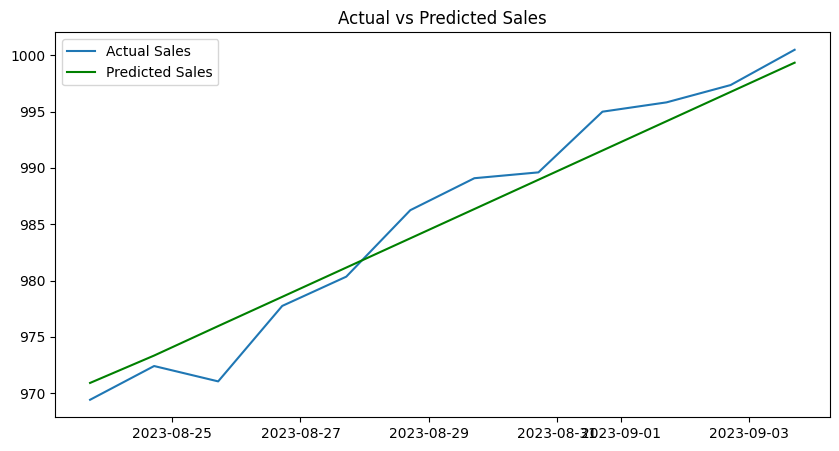

In [18]:
# Make predictions on the test set
forecast = arima_model.forecast(steps=len(test_data))

# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label="Actual Sales")
plt.plot(test_data.index, forecast, label="Predicted Sales", color="green")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


In [22]:
import os
import pickle

# Create the '../models' directory if it doesn't exist
if not os.path.exists('../models'):
    os.makedirs('../models')

# Save the ARIMA model to the '../models' folder
with open('../models/arima_model.pkl', 'wb') as pkl_file:
    pickle.dump(arima_model, pkl_file)
